## Diabetes Prediction Using Machine Learning Techniques

## Research Overview

> The goal of this project is to predict wheather a patient have diabetes or not.

## Dataset Overview
> The dataset used contained 520 instances and 17 features of diabetes patients. It can be downloaded [here](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.) 

In [45]:
# Import the needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_theme()
%matplotlib inline
from wordcloud import WordCloud

In [46]:
# aggre_df = pd.read_csv("conventional-marketing.csv")
diabetes_df = pd.read_csv("diabetes_data.csv")
# View the first 5 records

In [47]:
diabetes_df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [48]:
# Check the number of rows and columns in the dataset
diabetes_df.shape

(520, 17)

In [49]:
for i, v in enumerate (diabetes_df):
    print(i, v)

0 Age
1 Gender
2 Polyuria
3 Polydipsia
4 sudden weight loss
5 weakness
6 Polyphagia
7 Genital thrush
8 visual blurring
9 Itching
10 Irritability
11 delayed healing
12 partial paresis
13 muscle stiffness
14 Alopecia
15 Obesity
16 class


In [50]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [51]:
# Check the statistical distribution of the datatset
diabetes_df.describe()

,Age
count,520.000000
mean,48.028846
std,12.151466
min,16.000000
25%,39.000000
50%,47.500000
75%,57.000000
max,90.000000


Thee minimum patient age is 16 years, the maximum age is 90 years, while the average patient age is 48 years.

In [52]:
# Normalize the column name and replace white space ( ) with underscore (_) 
diabetes_df.columns = diabetes_df.columns.str.replace(' ', '_').str.lower()
diabetes_df.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [53]:
# Check for missing values
print("Number of missing value is", sum(diabetes_df.isna().sum()))

Number of missing value is 0


In [54]:
# Replace every occurrence of Yes and No with 1 and 0
diabetes_df = diabetes_df.replace(to_replace = ['Yes','No'],value = ['1','0'])
# diabetes_df.columns.astye(int)

# Replace every occurrence of Male and Female with 1 and 0
diabetes_df.gender.replace(['Male', 'Female'], [1,0], inplace=True)

# Replace every occurrence of Positive and Negative with 1 and 0
diabetes_df['class'].replace(['Positive', 'Negative'], [1,0], inplace=True)

# Confirm replacement
diabetes_df.head(10)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [55]:
diabetes_df = diabetes_df.astype(int)

In [56]:
diabetes_df['class'].value_counts()

1    320
0    200
Name: class, dtype: int64

Text(0, 0.5, 'Counts')

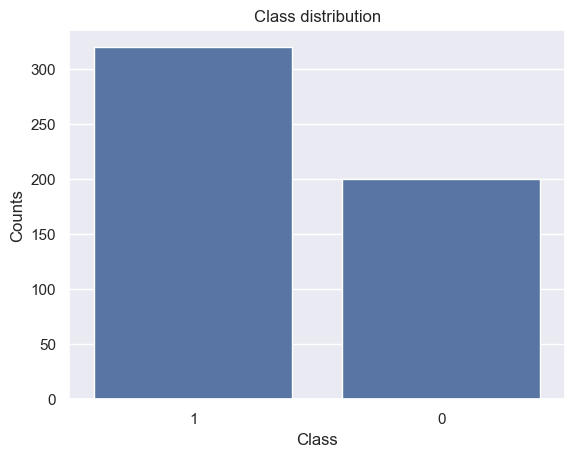

In [57]:
# check for diabetes class distribution
base_color = sb.color_palette()[0]
base_order = diabetes_df['class'].value_counts().index
sb.countplot(x='class', data=diabetes_df,  color=base_color, order=base_order)
plt.title('Class distribution')
plt.xlabel('Class')
plt.ylabel("Counts")

320 of the patients are diabetes positive, while 200 of them are negative.

Since this project focus more on prediction and not analytics, the next step is to start model buidling, training and prediction.

In [58]:
# Divide the dataset into independent features and dependent feature
X = diabetes_df.drop('class', axis=1)
y = diabetes_df['class']

In [59]:
import sklearn
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,fbeta_score,make_scorer,precision_score,recall_score 
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Decision Tree Algorithm

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
# Create Decision Tree classifer object
decision_tree_model = DecisionTreeClassifier()
# Train Decision Tree Classifer
decision_tree_model.fit(X_train, y_train)
# Predict the response on test data
y_pred = decision_tree_model.predict(X_test)
# Model Accuracy and other metrics, how often is the classifier correct?
dt_accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Test Accuracy is", dt_accuracy)
print("Recall is ", metrics.recall_score(y_test,y_pred))
print('Precision is', metrics.precision_score(y_test,y_pred))
print("F-1 Score is", metrics.f1_score(y_test,y_pred))

Test Accuracy is 0.9423076923076923
Recall is  0.9538461538461539
Precision is 0.9538461538461539
F-1 Score is 0.9538461538461539


### XGBoost Algorithm

In [62]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [63]:
import xgboost as xgb
from xgboost import XGBClassifier

In [64]:
# Create XGBoost classifer object
xgb_model = XGBClassifier()
# Train XGBoost Classifer
xgb_model.fit(X_train, y_train)
# Predict the response on test data
y_pred = xgb_model.predict(X_test)
# Model Accuracy and other metrics, how often is the classifier correct?
xgb_accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Test Accuracy is", xgb_accuracy)
print("Recall is ", metrics.recall_score(y_test,y_pred))
print('Precision is', metrics.precision_score(y_test,y_pred))
print("F-1 Score is", metrics.f1_score(y_test,y_pred))

Test Accuracy is 0.9711538461538461
Recall is  0.9846153846153847
Precision is 0.9696969696969697
F-1 Score is 0.9770992366412214


### Logistic Regression Algorithm

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
import warnings
warnings.filterwarnings('ignore')
# Create Logistic Regression classifer object
logreg_model = LogisticRegression()
# Train LogisticRegression Classifer
logreg_model.fit(X_train, y_train)
# Predict the response on test data
y_pred = logreg_model.predict(X_test)
# Model Accuracy and other metrics, how often is the classifier correct?
lr_accuracy =  metrics.accuracy_score(y_test,y_pred)
print("Test Accuracy is", lr_accuracy)
print("Recall is ", metrics.recall_score(y_test,y_pred))
print('Precision is', metrics.precision_score(y_test,y_pred))
print("F-1 Score is", metrics.f1_score(y_test,y_pred))

Test Accuracy is 0.9423076923076923
Recall is  0.9384615384615385
Precision is 0.9682539682539683
F-1 Score is 0.953125


#### Confusion Matrix For XGBoost Algorithm

In [67]:
confusion_matrix_xgb = metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix_xgb)

[[37  2]
 [ 4 61]]


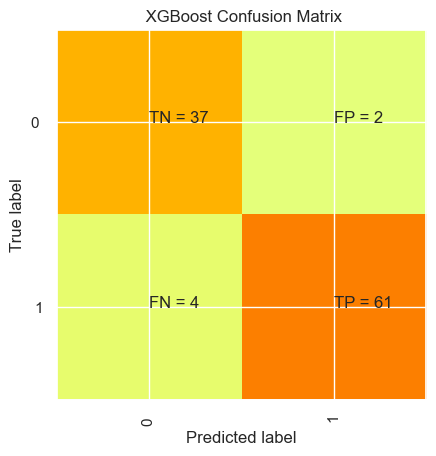

In [68]:
# Plotting the confusion matrix for Decision Tree Algorithm
plt.clf()
classNames = ["0 ", "1"]
plt.imshow(confusion_matrix_xgb, interpolation='nearest', cmap=plt.cm.Wistia)
plt.title(' XGBoost Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=90)
plt.yticks(tick_marks, classNames)
v = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(v[i][j])+" = "+str(confusion_matrix_xgb[i][j]))
plt.show()

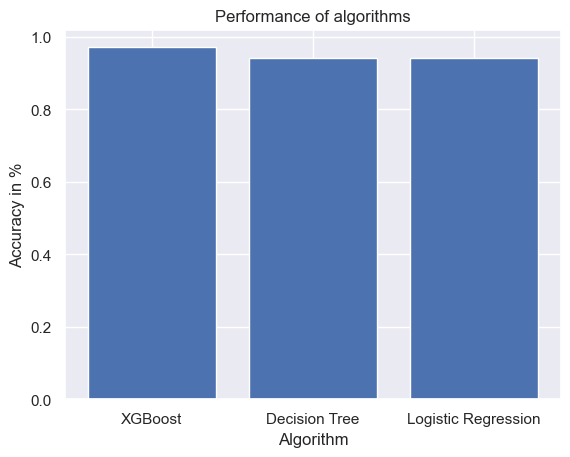

In [69]:
x = np.array(["XGBoost", "Decision Tree", "Logistic Regression"])
y = np.array([xgb_accuracy, dt_accuracy, lr_accuracy])

plt.bar(x, y)
plt.title("Performance of algorithms")
plt.ylabel("Accuracy in %")
plt.xlabel("Algorithm")
plt.show()


> XGBoost have the highest accuracy with 99% accuracy.